In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
x_train = pd.read_csv('dataset\\train.csv')
train_id = x_train['pet_id']
test = pd.read_csv('dataset//test.csv')
test_id = test['pet_id']
x_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [59]:
x_train.rename(columns = {'length(m)': 'length', 'height(cm)': 'height'}, inplace=True)
test.rename(columns = {'length(m)': 'length', 'height(cm)': 'height'}, inplace=True)

In [60]:
x_train.describe()

,condition,length,height,X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length            18834 non-null float64
height            18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [62]:
x_train['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [63]:
#pd.crosstab(x_train['color_type'], x_train['breed_category'])

In [64]:
pd.crosstab(x_train['condition'], x_train['pet_category'])

pet_category,0,1,2,4
condition,,,,
0.0,0,2376,3875,30
1.0,0,2218,4576,25
2.0,37,2007,2110,103


In [65]:
x_train['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [66]:
x_train['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [67]:
#sns.pairplot(train)

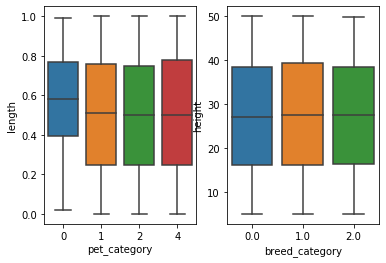

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
sns.boxplot(x='pet_category', y='length', data=x_train, ax=ax[0])
sns.boxplot(x='breed_category', y='height', data=x_train, ax=ax[1])

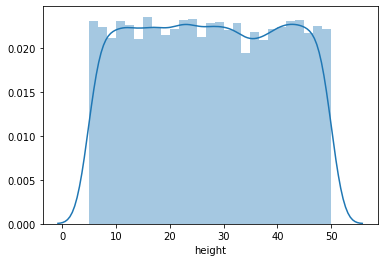

In [69]:
sns.distplot(x_train['height'])

In [70]:
y_train_1 = x_train['breed_category']
y_train_2 = x_train['pet_category']
train = x_train.drop(['breed_category', 'pet_category'], axis=1)

In [71]:
df = [train, test]
for df in [train, test]:    
    duration = pd.to_datetime(df['listing_date'])-pd.to_datetime(df['issue_date'])
    duration = duration.dt.days
    df['duration'] =  duration
    size = df['length']*df['height']
    df['size'] = size
    df[['color_type','X1', 'X2', 'condition']] = df[['color_type','X1', 'X2', 'condition']].astype('category')
    df.drop(['pet_id', 'issue_date', 'listing_date'], axis =1, inplace=True)

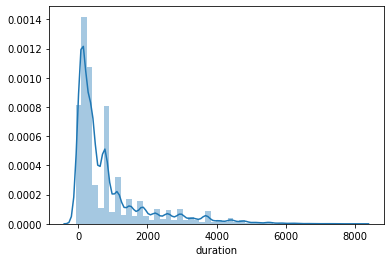

In [72]:
sns.distplot(train['duration'], bins=50)

In [73]:
train.describe()

,length,height,duration,size
count,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.502636,27.448832,855.306786,13.779984
std,0.288705,13.019781,1096.674990,10.940373
min,0.000000,5.000000,-76.000000,0.000000
25%,0.250000,16.172500,119.000000,4.944725
50%,0.500000,27.340000,392.000000,10.942500
75%,0.760000,38.890000,1117.000000,20.483575
max,1.000000,50.000000,8056.000000,49.780000


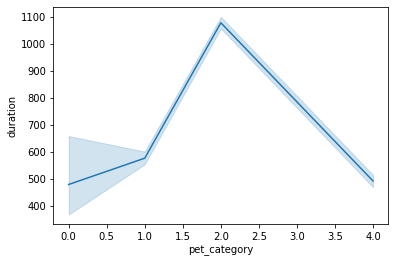

In [74]:
sns.lineplot(y=train['duration'], x=x_train['pet_category'].astype('category'))

In [75]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=2)
train['condition'] = imp.fit_transform(np.array(train['condition']).reshape(-1,1))
test['condition'] = imp.transform(np.array(test['condition']).reshape(-1,1))

In [76]:
test.head()

,condition,color_type,length,height,X1,X2,duration,size
0,0.0,Black,0.87,42.73,0,7,4404,37.1751
1,1.0,Orange Tabby,0.06,6.71,0,1,174,0.4026
2,1.0,Black,0.24,41.21,0,7,1999,9.8904
3,1.0,Black,0.29,8.46,7,1,1148,2.4534
4,1.0,Brown,0.71,30.92,0,7,463,21.9532


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 8 columns):
condition     18834 non-null float64
color_type    18834 non-null category
length        18834 non-null float64
height        18834 non-null float64
X1            18834 non-null category
X2            18834 non-null category
duration      18834 non-null int64
size          18834 non-null float64
dtypes: category(3), float64(4), int64(1)
memory usage: 795.1 KB


In [78]:
test.head()

,condition,color_type,length,height,X1,X2,duration,size
0,0.0,Black,0.87,42.73,0,7,4404,37.1751
1,1.0,Orange Tabby,0.06,6.71,0,1,174,0.4026
2,1.0,Black,0.24,41.21,0,7,1999,9.8904
3,1.0,Black,0.29,8.46,7,1,1148,2.4534
4,1.0,Brown,0.71,30.92,0,7,463,21.9532


In [79]:
train.head()

,condition,color_type,length,height,X1,X2,duration,size
0,2.0,Brown Tabby,0.80,7.78,13,9,73,6.2240
1,1.0,White,0.72,14.19,13,9,1862,10.2168
2,2.0,Brown,0.15,40.90,15,4,752,6.1350
3,1.0,White,0.62,17.82,0,1,755,11.0484
4,2.0,Black,0.50,11.06,18,4,52,5.5300


In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
col = ColumnTransformer([
    ('scale', StandardScaler(), ['length', 'height',  'size', 'duration']),
    ('encoding', OneHotEncoder(handle_unknown='ignore', sparse=False), ['condition', 'color_type', 'X1', 'X2'])
    #('to_cate', KBinsDiscretizer(n_bins=50, strategy='uniform'), ['duration'])
])

In [82]:
train = col.fit_transform(train)
test = col.transform(test)

In [83]:
train.shape

(18834, 93)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
train = pca.fit_transform(train)
test = pca.transform(test)

In [84]:
test.shape

(8072, 93)

In [85]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

forest = GradientBoostingClassifier(validation_fraction=0.3,  n_iter_no_change=50,random_state=3)
params = {
     'n_estimators' : np.arange(200, 1000, 50),
    'learning_rate': [0.1, 0.01],
    'subsample' : [0.5,0.6,0.7,0.8,0.9],
    'max_depth' : [3,4,5,6],
    'max_features' : [0.5,0.6,0.7,0.8,0.9]
    #ccp_alpha 
}
tune_1 = RandomizedSearchCV(forest, params, scoring='f1_micro', cv=5)
tune_1.fit(train, y_train_1)
print(tune_1.score(train, y_train_1))
val1 = cross_val_score(tune_1.best_estimator_, X=train, y=y_train_1, cv=5)
print(val1.mean())
print(val1)
forest1 = GradientBoostingClassifier(validation_fraction=0.3,  n_iter_no_change=50,random_state=3)
params1 = {
     'n_estimators' : np.arange(200, 1000, 50),
    'learning_rate': [0.1, 0.01],
    'subsample' : [0.5,0.6,0.7,0.8,0.9],
    'max_depth' : [3,4,5,6],
    'max_features' : [0.5,0.6,0.7,0.8,0.9]
}
tune_2 = RandomizedSearchCV(forest1, params1, scoring='f1_micro', cv=5)
tune_2.fit(train, y_train_2)
print(tune_2.score(train, y_train_2))
val2 = cross_val_score(tune_1.best_estimator_, X=train, y=y_train_2, cv=5)
print(val2.mean())
print(val2)

0.8831368801104386
0.8695437542760656
[0.86647199 0.87337404 0.87496682 0.87629413 0.85661179]
0.907773176170755
0.8894020676808594
[0.88611627 0.89116007 0.89248739 0.88930183 0.88794477]


In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier

forest = XGBClassifier(eval_metric='auc',random_state=3, n_jobs=-1)
params = {
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],
    'min_split_loss' : [1,2,3,4,5],
    'max_depth' : [3,4,5,6],
    'subsample' : [0.5,0.6,0.7,0.8,0.9]
}
tune_1 = RandomizedSearchCV(forest, params, scoring='f1_micro', cv=5)
tune_1.fit(train, y_train_1)
print(tune_1.score(train, y_train_1))
val1 = cross_val_score(tune_1.best_estimator_, X=train, y=y_train_1, cv=5)
print(val1.mean())
print(val1)
forest1 = XGBClassifier(eval_metric='auc',random_state=3, n_jobs=-1)
params1 = {
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],
    'min_split_loss' : [1,2,3,4,5],
    'max_depth' : [3,4,5,6],
    'subsample' : [0.5,0.6,0.7,0.8,0.9]
}
tune_2 = RandomizedSearchCV(forest1, params1, scoring='f1_micro', cv=5)
tune_2.fit(train, y_train_2)
print(tune_2.score(train, y_train_2))
val2 = cross_val_score(tune_2.best_estimator_, X=train, y=y_train_2, cv=5)
print(val2.mean())
print(val2)

0.8794201975151322
0.8724108699792662
[0.86779931 0.8765596  0.88319618 0.87576321 0.85873606]
0.9071360305829882
0.8981097128669028
[0.89540749 0.90337138 0.89885851 0.89646934 0.89644185]


In [188]:
#from sklearn.neighborsghbors import KNeighborsClassifier

knn = RandomForestClassifier()
params = {
    'n_estimators' : np.arange(200, 1000, 50),
    'mafeatures' : np.arange(0.4, 0.8,0.1)
    #ccp_alpha 
}
#tune_1 = RandomizedSearchCV(forest, params, scoring='accuracy', cv=5)
knn.fit(train, y_train_1)
print(knn.score(train, y_train_1))
val1 = cross_val_score(knn, X=train, y=y_train_1, cv=5)
print(val1.mean())
print(val1)
knn1 = RandomForestClassifier()
params1 = {
    'n_estimators' : np.arange(200, 1000, 50),
    'mafeatures' : np.arange(0.4, 0.8,0.1)
    #ccp_alpha 
}
#tune_2 = RandomizedSearchCV(forest1, params1, scoring='accuracy', cv=5)
knn1.fit(train, y_train_2)
print(knn1.score(train, y_train_2))
val2 = cross_val_score(knn1, X=train, y=y_train_2, cv=5)
print(val2.mean())
print(val2)

0.9999469045343528


KeyboardInterrupt: 

In [189]:
knn = RandomForestClassifier()
knn.fit(train, y_train_1)
knn1 = RandomForestClassifier()
knn1.fit(train, y_train_2)


RandomForestClassifier()

In [87]:
y_train_1_n = pd.get_dummies(y_train_1)
y_train_2_n = pd.get_dummies(y_train_2)

In [89]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
import kerastuner as kt
from keras.callbacks import EarlyStopping

def model_builder_1(hp):
    model=Sequential()
    model.add(Dense(units=hp.Int('units_1st_layer', 16, 128, 16), activation='relu', input_dim=train.shape[1]))
    for i in range(hp.Int('no_layers',1,6,1)):
        model.add(Dense(units=hp.Int('units_'+str(i), 16, 128, 16), activation='relu'))
    model.add(Dense(units=3, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', values=[0.1, 0.01, 0.001])),
                 loss='categorical_crossentropy', metrics='accuracy')
    return model
tuner_1 = kt.Hyperband(model_builder_1, objective='val_accuracy', max_epochs=6, directory='neural', project_name='minee')

In [90]:
import IPython
import keras
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)
class ClearOutput(keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait=True)
tuner_1.search(train, y_train_1_n, validation_split=0.3, epochs=6, callbacks=[ClearOutput()])

INFO:tensorflow:Oracle triggered exit


In [91]:
best_hps = tuner_1.get_best_hyperparameters()[0]
tuned_model_1 = tuner_1.hypermodel.build(best_hps)
tuned_model_1.fit(train, y_train_1_n, validation_split=0.3, epochs=800, callbacks=[es])

Epoch 1/800
412/412 [==============================] - ETA: 0s - loss: 1.0989 - accuracy: 0.34 - ETA: 1s - loss: 1.0586 - accuracy: 0.54 - ETA: 1s - loss: 1.0076 - accuracy: 0.57 - ETA: 1s - loss: 0.9547 - accuracy: 0.58 - ETA: 1s - loss: 0.8855 - accuracy: 0.63 - ETA: 0s - loss: 0.7783 - accuracy: 0.67 - ETA: 0s - loss: 0.7075 - accuracy: 0.70 - ETA: 0s - loss: 0.6551 - accuracy: 0.71 - ETA: 0s - loss: 0.6088 - accuracy: 0.73 - ETA: 0s - loss: 0.5775 - accuracy: 0.74 - ETA: 0s - loss: 0.5510 - accuracy: 0.75 - ETA: 0s - loss: 0.5347 - accuracy: 0.75 - ETA: 0s - loss: 0.5227 - accuracy: 0.76 - ETA: 0s - loss: 0.5067 - accuracy: 0.76 - ETA: 0s - loss: 0.4896 - accuracy: 0.77 - ETA: 0s - loss: 0.4747 - accuracy: 0.78 - ETA: 0s - loss: 0.4639 - accuracy: 0.78 - ETA: 0s - loss: 0.4523 - accuracy: 0.78 - ETA: 0s - loss: 0.4429 - accuracy: 0.79 - ETA: 0s - loss: 0.4366 - accuracy: 0.79 - ETA: 0s - loss: 0.4282 - accuracy: 0.79 - ETA: 0s - loss: 0.4211 - accuracy: 0.80 - ETA: 0s - loss: 0.416

Epoch 7/800
412/412 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.81 - ETA: 1s - loss: 0.2407 - accuracy: 0.87 - ETA: 1s - loss: 0.2441 - accuracy: 0.87 - ETA: 1s - loss: 0.2518 - accuracy: 0.87 - ETA: 1s - loss: 0.2584 - accuracy: 0.86 - ETA: 1s - loss: 0.2545 - accuracy: 0.86 - ETA: 1s - loss: 0.2483 - accuracy: 0.86 - ETA: 1s - loss: 0.2493 - accuracy: 0.86 - ETA: 1s - loss: 0.2471 - accuracy: 0.87 - ETA: 1s - loss: 0.2489 - accuracy: 0.86 - ETA: 1s - loss: 0.2481 - accuracy: 0.87 - ETA: 0s - loss: 0.2463 - accuracy: 0.87 - ETA: 0s - loss: 0.2451 - accuracy: 0.87 - ETA: 0s - loss: 0.2450 - accuracy: 0.87 - ETA: 0s - loss: 0.2458 - accuracy: 0.87 - ETA: 0s - loss: 0.2440 - accuracy: 0.87 - ETA: 0s - loss: 0.2440 - accuracy: 0.87 - ETA: 0s - loss: 0.2429 - accuracy: 0.87 - ETA: 0s - loss: 0.2436 - accuracy: 0.87 - ETA: 0s - loss: 0.2444 - accuracy: 0.87 - ETA: 0s - loss: 0.2466 - accuracy: 0.87 - ETA: 0s - loss: 0.2469 - accuracy: 0.87 - ETA: 0s - loss: 0.246

412/412 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 1.00 - ETA: 1s - loss: 0.2404 - accuracy: 0.86 - ETA: 1s - loss: 0.2366 - accuracy: 0.87 - ETA: 1s - loss: 0.2371 - accuracy: 0.87 - ETA: 1s - loss: 0.2465 - accuracy: 0.87 - ETA: 1s - loss: 0.2367 - accuracy: 0.87 - ETA: 1s - loss: 0.2340 - accuracy: 0.87 - ETA: 1s - loss: 0.2354 - accuracy: 0.87 - ETA: 1s - loss: 0.2363 - accuracy: 0.87 - ETA: 1s - loss: 0.2359 - accuracy: 0.87 - ETA: 1s - loss: 0.2361 - accuracy: 0.87 - ETA: 1s - loss: 0.2392 - accuracy: 0.87 - ETA: 1s - loss: 0.2382 - accuracy: 0.87 - ETA: 1s - loss: 0.2376 - accuracy: 0.87 - ETA: 0s - loss: 0.2333 - accuracy: 0.87 - ETA: 0s - loss: 0.2321 - accuracy: 0.88 - ETA: 0s - loss: 0.2311 - accuracy: 0.88 - ETA: 0s - loss: 0.2315 - accuracy: 0.88 - ETA: 0s - loss: 0.2309 - accuracy: 0.88 - ETA: 0s - loss: 0.2315 - accuracy: 0.88 - ETA: 0s - loss: 0.2305 - accuracy: 0.88 - ETA: 0s - loss: 0.2306 - accuracy: 0.88 - ETA: 0s - loss: 0.2311 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.84 - ETA: 1s - loss: 0.2259 - accuracy: 0.88 - ETA: 1s - loss: 0.2235 - accuracy: 0.88 - ETA: 1s - loss: 0.2173 - accuracy: 0.89 - ETA: 0s - loss: 0.2191 - accuracy: 0.89 - ETA: 0s - loss: 0.2180 - accuracy: 0.89 - ETA: 0s - loss: 0.2189 - accuracy: 0.89 - ETA: 0s - loss: 0.2219 - accuracy: 0.89 - ETA: 0s - loss: 0.2202 - accuracy: 0.89 - ETA: 0s - loss: 0.2214 - accuracy: 0.89 - ETA: 0s - loss: 0.2235 - accuracy: 0.89 - ETA: 0s - loss: 0.2239 - accuracy: 0.89 - ETA: 0s - loss: 0.2229 - accuracy: 0.89 - ETA: 0s - loss: 0.2239 - accuracy: 0.88 - ETA: 0s - loss: 0.2232 - accuracy: 0.88 - ETA: 0s - loss: 0.2233 - accuracy: 0.88 - ETA: 0s - loss: 0.2235 - accuracy: 0.88 - ETA: 0s - loss: 0.2225 - accuracy: 0.88 - ETA: 0s - loss: 0.2243 - accuracy: 0.88 - ETA: 0s - loss: 0.2230 - accuracy: 0.88 - ETA: 0s - loss: 0.2226 - accuracy: 0.88 - ETA: 0s - loss: 0.2226 - accuracy: 0.88 - ETA: 0s - loss: 0.2229 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.96 - ETA: 2s - loss: 0.2054 - accuracy: 0.88 - ETA: 2s - loss: 0.1861 - accuracy: 0.89 - ETA: 2s - loss: 0.1821 - accuracy: 0.90 - ETA: 2s - loss: 0.1884 - accuracy: 0.89 - ETA: 2s - loss: 0.1989 - accuracy: 0.89 - ETA: 2s - loss: 0.2017 - accuracy: 0.88 - ETA: 2s - loss: 0.1934 - accuracy: 0.89 - ETA: 1s - loss: 0.1989 - accuracy: 0.89 - ETA: 1s - loss: 0.2013 - accuracy: 0.89 - ETA: 1s - loss: 0.2041 - accuracy: 0.89 - ETA: 1s - loss: 0.2046 - accuracy: 0.89 - ETA: 1s - loss: 0.2085 - accuracy: 0.89 - ETA: 1s - loss: 0.2081 - accuracy: 0.89 - ETA: 1s - loss: 0.2088 - accuracy: 0.89 - ETA: 1s - loss: 0.2097 - accuracy: 0.89 - ETA: 1s - loss: 0.2106 - accuracy: 0.89 - ETA: 1s - loss: 0.2122 - accuracy: 0.89 - ETA: 1s - loss: 0.2114 - accuracy: 0.89 - ETA: 1s - loss: 0.2127 - accuracy: 0.89 - ETA: 0s - loss: 0.2144 - accuracy: 0.88 - ETA: 0s - loss: 0.2144 - accuracy: 0.88 - ETA: 0s - loss: 0.2160 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.81 - ETA: 1s - loss: 0.2015 - accuracy: 0.89 - ETA: 1s - loss: 0.1956 - accuracy: 0.89 - ETA: 1s - loss: 0.1956 - accuracy: 0.89 - ETA: 1s - loss: 0.1992 - accuracy: 0.89 - ETA: 1s - loss: 0.1945 - accuracy: 0.89 - ETA: 1s - loss: 0.1937 - accuracy: 0.89 - ETA: 0s - loss: 0.1949 - accuracy: 0.89 - ETA: 0s - loss: 0.1916 - accuracy: 0.89 - ETA: 0s - loss: 0.1951 - accuracy: 0.89 - ETA: 0s - loss: 0.1963 - accuracy: 0.89 - ETA: 0s - loss: 0.1969 - accuracy: 0.89 - ETA: 0s - loss: 0.1954 - accuracy: 0.89 - ETA: 0s - loss: 0.1959 - accuracy: 0.89 - ETA: 0s - loss: 0.1966 - accuracy: 0.89 - ETA: 0s - loss: 0.1990 - accuracy: 0.89 - ETA: 0s - loss: 0.1994 - accuracy: 0.89 - ETA: 0s - loss: 0.2013 - accuracy: 0.89 - ETA: 0s - loss: 0.2039 - accuracy: 0.89 - ETA: 0s - loss: 0.2031 - accuracy: 0.89 - ETA: 0s - loss: 0.2059 - accuracy: 0.89 - ETA: 0s - loss: 0.2059 - accuracy: 0.89 - ETA: 0s - loss: 0.2072 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.90 - ETA: 1s - loss: 0.1611 - accuracy: 0.91 - ETA: 1s - loss: 0.1808 - accuracy: 0.90 - ETA: 1s - loss: 0.1843 - accuracy: 0.90 - ETA: 1s - loss: 0.1872 - accuracy: 0.90 - ETA: 1s - loss: 0.1952 - accuracy: 0.90 - ETA: 1s - loss: 0.1943 - accuracy: 0.90 - ETA: 0s - loss: 0.1941 - accuracy: 0.90 - ETA: 0s - loss: 0.1908 - accuracy: 0.90 - ETA: 0s - loss: 0.1898 - accuracy: 0.90 - ETA: 0s - loss: 0.1883 - accuracy: 0.90 - ETA: 0s - loss: 0.1894 - accuracy: 0.90 - ETA: 0s - loss: 0.1884 - accuracy: 0.90 - ETA: 0s - loss: 0.1872 - accuracy: 0.91 - ETA: 0s - loss: 0.1893 - accuracy: 0.90 - ETA: 0s - loss: 0.1888 - accuracy: 0.90 - ETA: 0s - loss: 0.1908 - accuracy: 0.90 - ETA: 0s - loss: 0.1938 - accuracy: 0.90 - ETA: 0s - loss: 0.1943 - accuracy: 0.90 - ETA: 0s - loss: 0.1940 - accuracy: 0.90 - ETA: 0s - loss: 0.1963 - accuracy: 0.90 - ETA: 0s - loss: 0.1968 - accuracy: 0.90 - ETA: 0s - loss: 0.1976 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.96 - ETA: 1s - loss: 0.1995 - accuracy: 0.90 - ETA: 1s - loss: 0.1801 - accuracy: 0.91 - ETA: 1s - loss: 0.1840 - accuracy: 0.90 - ETA: 1s - loss: 0.1945 - accuracy: 0.90 - ETA: 1s - loss: 0.1919 - accuracy: 0.89 - ETA: 1s - loss: 0.1884 - accuracy: 0.90 - ETA: 1s - loss: 0.1873 - accuracy: 0.90 - ETA: 1s - loss: 0.1856 - accuracy: 0.90 - ETA: 1s - loss: 0.1822 - accuracy: 0.90 - ETA: 1s - loss: 0.1823 - accuracy: 0.90 - ETA: 0s - loss: 0.1845 - accuracy: 0.90 - ETA: 0s - loss: 0.1825 - accuracy: 0.90 - ETA: 0s - loss: 0.1836 - accuracy: 0.90 - ETA: 0s - loss: 0.1843 - accuracy: 0.90 - ETA: 0s - loss: 0.1839 - accuracy: 0.90 - ETA: 0s - loss: 0.1853 - accuracy: 0.90 - ETA: 0s - loss: 0.1843 - accuracy: 0.90 - ETA: 0s - loss: 0.1845 - accuracy: 0.90 - ETA: 0s - loss: 0.1843 - accuracy: 0.90 - ETA: 0s - loss: 0.1839 - accuracy: 0.90 - ETA: 0s - loss: 0.1845 - accuracy: 0.90 - ETA: 0s - loss: 0.1839 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.0898 - accuracy: 0.93 - ETA: 1s - loss: 0.1718 - accuracy: 0.91 - ETA: 1s - loss: 0.1691 - accuracy: 0.92 - ETA: 1s - loss: 0.1716 - accuracy: 0.91 - ETA: 1s - loss: 0.1821 - accuracy: 0.91 - ETA: 1s - loss: 0.1821 - accuracy: 0.90 - ETA: 2s - loss: 0.1791 - accuracy: 0.90 - ETA: 2s - loss: 0.1786 - accuracy: 0.90 - ETA: 2s - loss: 0.1810 - accuracy: 0.90 - ETA: 1s - loss: 0.1804 - accuracy: 0.90 - ETA: 1s - loss: 0.1798 - accuracy: 0.90 - ETA: 1s - loss: 0.1736 - accuracy: 0.91 - ETA: 1s - loss: 0.1760 - accuracy: 0.91 - ETA: 1s - loss: 0.1720 - accuracy: 0.91 - ETA: 1s - loss: 0.1740 - accuracy: 0.91 - ETA: 1s - loss: 0.1723 - accuracy: 0.91 - ETA: 1s - loss: 0.1756 - accuracy: 0.91 - ETA: 1s - loss: 0.1785 - accuracy: 0.90 - ETA: 1s - loss: 0.1778 - accuracy: 0.90 - ETA: 1s - loss: 0.1788 - accuracy: 0.90 - ETA: 1s - loss: 0.1792 - accuracy: 0.90 - ETA: 1s - loss: 0.1784 - accuracy: 0.90 - ETA: 1s - loss: 0.1799 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.90 - ETA: 1s - loss: 0.1639 - accuracy: 0.91 - ETA: 1s - loss: 0.1573 - accuracy: 0.92 - ETA: 1s - loss: 0.1629 - accuracy: 0.91 - ETA: 1s - loss: 0.1564 - accuracy: 0.92 - ETA: 1s - loss: 0.1554 - accuracy: 0.92 - ETA: 1s - loss: 0.1633 - accuracy: 0.91 - ETA: 1s - loss: 0.1690 - accuracy: 0.91 - ETA: 1s - loss: 0.1675 - accuracy: 0.91 - ETA: 1s - loss: 0.1678 - accuracy: 0.91 - ETA: 1s - loss: 0.1679 - accuracy: 0.91 - ETA: 1s - loss: 0.1692 - accuracy: 0.91 - ETA: 1s - loss: 0.1705 - accuracy: 0.91 - ETA: 1s - loss: 0.1728 - accuracy: 0.91 - ETA: 0s - loss: 0.1743 - accuracy: 0.91 - ETA: 0s - loss: 0.1749 - accuracy: 0.91 - ETA: 0s - loss: 0.1763 - accuracy: 0.91 - ETA: 0s - loss: 0.1758 - accuracy: 0.91 - ETA: 0s - loss: 0.1771 - accuracy: 0.91 - ETA: 0s - loss: 0.1772 - accuracy: 0.91 - ETA: 0s - loss: 0.1784 - accuracy: 0.90 - ETA: 0s - loss: 0.1779 - accuracy: 0.90 - ETA: 0s - loss: 0.1774 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.96 - ETA: 1s - loss: 0.1875 - accuracy: 0.89 - ETA: 1s - loss: 0.1721 - accuracy: 0.90 - ETA: 1s - loss: 0.1797 - accuracy: 0.89 - ETA: 1s - loss: 0.1715 - accuracy: 0.90 - ETA: 1s - loss: 0.1696 - accuracy: 0.90 - ETA: 0s - loss: 0.1675 - accuracy: 0.91 - ETA: 0s - loss: 0.1659 - accuracy: 0.91 - ETA: 0s - loss: 0.1708 - accuracy: 0.91 - ETA: 0s - loss: 0.1689 - accuracy: 0.91 - ETA: 0s - loss: 0.1678 - accuracy: 0.91 - ETA: 0s - loss: 0.1696 - accuracy: 0.91 - ETA: 0s - loss: 0.1695 - accuracy: 0.91 - ETA: 0s - loss: 0.1693 - accuracy: 0.91 - ETA: 0s - loss: 0.1685 - accuracy: 0.91 - ETA: 0s - loss: 0.1667 - accuracy: 0.91 - ETA: 0s - loss: 0.1680 - accuracy: 0.91 - ETA: 0s - loss: 0.1702 - accuracy: 0.91 - ETA: 0s - loss: 0.1716 - accuracy: 0.91 - ETA: 0s - loss: 0.1713 - accuracy: 0.91 - ETA: 0s - loss: 0.1722 - accuracy: 0.91 - ETA: 0s - loss: 0.1720 - accuracy: 0.91 - ETA: 0s - loss: 0.1725 - accuracy

In [92]:
def model_builder_2(hp):
    model=Sequential()
    model.add(Dense(units=hp.Int('units_1st_layer', 16, 128, 16), activation='relu', input_dim=train.shape[1]))
    for i in range(hp.Int('no_layers',1,6,1)):
        model.add(Dense(units=hp.Int('units_'+str(i), 16, 128, 16), activation='relu'))
    model.add(Dense(units=4, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', values=[0.1, 0.01, 0.001])),
                 loss='categorical_crossentropy', metrics='accuracy')
    return model
tuner_2 = kt.Hyperband(model_builder_2, objective='val_accuracy', max_epochs=6, directory='neural_', project_name='mine222')
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)
class ClearOutput(keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait=True)
tuner_2.search(train, y_train_2_n, validation_split=0.3, epochs=3, callbacks=[ClearOutput()])

INFO:tensorflow:Oracle triggered exit


In [95]:
best_hps = tuner_2.get_best_hyperparameters()[0]
tuned_model_2 = tuner_2.hypermodel.build(best_hps)
tuned_model_2.fit(train, y_train_2_n, validation_split=0.3, epochs=20, callbacks=[es])

Epoch 1/20
412/412 [==============================] - ETA: 0s - loss: 1.4003 - accuracy: 0.28 - ETA: 1s - loss: 0.9278 - accuracy: 0.49 - ETA: 1s - loss: 0.8769 - accuracy: 0.53 - ETA: 1s - loss: 0.8030 - accuracy: 0.55 - ETA: 1s - loss: 0.7479 - accuracy: 0.61 - ETA: 1s - loss: 0.6691 - accuracy: 0.66 - ETA: 0s - loss: 0.6048 - accuracy: 0.70 - ETA: 0s - loss: 0.5685 - accuracy: 0.73 - ETA: 0s - loss: 0.5357 - accuracy: 0.74 - ETA: 0s - loss: 0.5069 - accuracy: 0.76 - ETA: 0s - loss: 0.4849 - accuracy: 0.77 - ETA: 0s - loss: 0.4639 - accuracy: 0.78 - ETA: 0s - loss: 0.4487 - accuracy: 0.79 - ETA: 0s - loss: 0.4392 - accuracy: 0.79 - ETA: 0s - loss: 0.4356 - accuracy: 0.80 - ETA: 0s - loss: 0.4287 - accuracy: 0.80 - ETA: 0s - loss: 0.4221 - accuracy: 0.80 - ETA: 0s - loss: 0.4116 - accuracy: 0.81 - ETA: 0s - loss: 0.4037 - accuracy: 0.81 - ETA: 0s - loss: 0.3983 - accuracy: 0.82 - ETA: 0s - loss: 0.3951 - accuracy: 0.82 - ETA: 0s - loss: 0.3928 - accuracy: 0.82 - ETA: 0s - loss: 0.3895

412/412 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.87 - ETA: 1s - loss: 0.3024 - accuracy: 0.87 - ETA: 1s - loss: 0.2737 - accuracy: 0.90 - ETA: 1s - loss: 0.2731 - accuracy: 0.89 - ETA: 1s - loss: 0.2754 - accuracy: 0.89 - ETA: 1s - loss: 0.2791 - accuracy: 0.89 - ETA: 0s - loss: 0.2693 - accuracy: 0.89 - ETA: 0s - loss: 0.2718 - accuracy: 0.89 - ETA: 0s - loss: 0.2704 - accuracy: 0.89 - ETA: 0s - loss: 0.2718 - accuracy: 0.89 - ETA: 0s - loss: 0.2682 - accuracy: 0.89 - ETA: 0s - loss: 0.2676 - accuracy: 0.89 - ETA: 0s - loss: 0.2683 - accuracy: 0.89 - ETA: 0s - loss: 0.2700 - accuracy: 0.89 - ETA: 0s - loss: 0.2686 - accuracy: 0.89 - ETA: 0s - loss: 0.2715 - accuracy: 0.89 - ETA: 0s - loss: 0.2703 - accuracy: 0.89 - ETA: 0s - loss: 0.2674 - accuracy: 0.89 - ETA: 0s - loss: 0.2653 - accuracy: 0.89 - ETA: 0s - loss: 0.2672 - accuracy: 0.89 - ETA: 0s - loss: 0.2676 - accuracy: 0.89 - ETA: 0s - loss: 0.2684 - accuracy: 0.89 - ETA: 0s - loss: 0.2674 - accuracy

412/412 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.87 - ETA: 0s - loss: 0.2328 - accuracy: 0.91 - ETA: 0s - loss: 0.2573 - accuracy: 0.90 - ETA: 0s - loss: 0.2728 - accuracy: 0.89 - ETA: 0s - loss: 0.2694 - accuracy: 0.89 - ETA: 0s - loss: 0.2618 - accuracy: 0.90 - ETA: 0s - loss: 0.2597 - accuracy: 0.89 - ETA: 0s - loss: 0.2607 - accuracy: 0.89 - ETA: 0s - loss: 0.2619 - accuracy: 0.89 - ETA: 0s - loss: 0.2655 - accuracy: 0.89 - ETA: 0s - loss: 0.2641 - accuracy: 0.89 - ETA: 0s - loss: 0.2622 - accuracy: 0.89 - ETA: 0s - loss: 0.2629 - accuracy: 0.89 - ETA: 0s - loss: 0.2603 - accuracy: 0.89 - ETA: 0s - loss: 0.2571 - accuracy: 0.89 - ETA: 0s - loss: 0.2577 - accuracy: 0.89 - ETA: 0s - loss: 0.2580 - accuracy: 0.89 - ETA: 0s - loss: 0.2564 - accuracy: 0.89 - ETA: 0s - loss: 0.2548 - accuracy: 0.89 - ETA: 0s - loss: 0.2539 - accuracy: 0.89 - ETA: 0s - loss: 0.2544 - accuracy: 0.89 - 1s 3ms/step - loss: 0.2545 - accuracy: 0.8971 - val_loss: 0.3009 - val_accu

412/412 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.90 - ETA: 0s - loss: 0.2373 - accuracy: 0.90 - ETA: 0s - loss: 0.2461 - accuracy: 0.89 - ETA: 0s - loss: 0.2514 - accuracy: 0.89 - ETA: 0s - loss: 0.2518 - accuracy: 0.89 - ETA: 0s - loss: 0.2467 - accuracy: 0.89 - ETA: 0s - loss: 0.2382 - accuracy: 0.90 - ETA: 0s - loss: 0.2360 - accuracy: 0.90 - ETA: 0s - loss: 0.2375 - accuracy: 0.90 - ETA: 0s - loss: 0.2347 - accuracy: 0.90 - ETA: 0s - loss: 0.2338 - accuracy: 0.90 - ETA: 0s - loss: 0.2369 - accuracy: 0.90 - ETA: 0s - loss: 0.2358 - accuracy: 0.90 - ETA: 0s - loss: 0.2345 - accuracy: 0.90 - ETA: 0s - loss: 0.2355 - accuracy: 0.90 - ETA: 0s - loss: 0.2347 - accuracy: 0.90 - ETA: 0s - loss: 0.2360 - accuracy: 0.90 - ETA: 0s - loss: 0.2385 - accuracy: 0.90 - ETA: 0s - loss: 0.2390 - accuracy: 0.90 - ETA: 0s - loss: 0.2386 - accuracy: 0.90 - ETA: 0s - loss: 0.2399 - accuracy: 0.90 - ETA: 0s - loss: 0.2422 - accuracy: 0.90 - ETA: 0s - loss: 0.2435 - accuracy

In [90]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
ann = Sequential()
ann.add(Dense(units= 128, activation = 'relu', input_dim= train.shape[1]))
#ann.add(Dropout(0.6))
ann.add(Dense(units= 64, activation = 'relu'))
#ann.add(Dropout(0.6))
ann.add(Dense(units= 32, activation = 'relu'))
ann.add(Dense(units= 3, activation = 'sigmoid'))
ann.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics='accuracy')

In [91]:
ann.fit(train, y_train_1_n, validation_split=0.3, epochs=100)

Epoch 1/100
412/412 [==============================] - 1s 3ms/step - loss: 0.9997 - accuracy: 0.6411 - val_loss: 0.8911 - val_accuracy: 0.7623
Epoch 2/100
412/412 [==============================] - 1s 2ms/step - loss: 0.7595 - accuracy: 0.8097 - val_loss: 0.6162 - val_accuracy: 0.8161
Epoch 3/100
412/412 [==============================] - 1s 3ms/step - loss: 0.4666 - accuracy: 0.8280 - val_loss: 0.3758 - val_accuracy: 0.8285
Epoch 4/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8483 - val_loss: 0.3202 - val_accuracy: 0.8448
Epoch 5/100
412/412 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8585 - val_loss: 0.3014 - val_accuracy: 0.8498
Epoch 6/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.8589 - val_loss: 0.2909 - val_accuracy: 0.8533
Epoch 7/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2797 - accuracy: 0.8596 - val_loss: 0.2851 - val_accuracy: 0.8547

KeyboardInterrupt: 

In [76]:
ann1 = Sequential()
ann1.add(Dense(units= 32, activation = 'relu', input_dim= train.shape[1]))
ann1.add(Dense(units= 16, activation = 'relu'))
ann1.add(Dense(units= 4, activation = 'sigmoid'))
ann1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
ann1.fit(train, y_train_2_n, validation_split=0.3, epochs=100)

Epoch 1/100
412/412 [==============================] - 1s 2ms/step - loss: 0.6249 - accuracy: 0.7200 - val_loss: 0.3091 - val_accuracy: 0.8836
Epoch 2/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.8871 - val_loss: 0.2821 - val_accuracy: 0.8825
Epoch 3/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8883 - val_loss: 0.2778 - val_accuracy: 0.8862
Epoch 4/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8927 - val_loss: 0.2752 - val_accuracy: 0.8876
Epoch 5/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8915 - val_loss: 0.2829 - val_accuracy: 0.8814
Epoch 6/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2572 - accuracy: 0.8964 - val_loss: 0.2722 - val_accuracy: 0.8896
Epoch 7/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2545 - accuracy: 0.8957 - val_loss: 0.2759 - val_accuracy: 0.8890

Epoch 58/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9114 - val_loss: 0.3089 - val_accuracy: 0.8837
Epoch 59/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2096 - accuracy: 0.9118 - val_loss: 0.3199 - val_accuracy: 0.8804
Epoch 60/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2095 - accuracy: 0.9128 - val_loss: 0.3147 - val_accuracy: 0.8836
Epoch 61/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2091 - accuracy: 0.9128 - val_loss: 0.3123 - val_accuracy: 0.8867
Epoch 62/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9123 - val_loss: 0.3185 - val_accuracy: 0.8866
Epoch 63/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2071 - accuracy: 0.9128 - val_loss: 0.3177 - val_accuracy: 0.8855
Epoch 64/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9128 - val_loss: 0.3136 - val_accuracy:

In [274]:
y_train_2_n

,0,1,2,4
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
18829,0,0,1,0
18830,0,0,0,1
18831,0,1,0,0
18832,0,0,1,0


#### Output file for Neuralnets

In [96]:
y_pred_1 = tuned_model_1.predict(test)
y_pred_1 = np.argmax(y_pred_1, axis=1)
y_pred_2 = tuned_model_2.predict(test)
y_pred_2 = np.argmax(y_pred_2, axis=1)
y_pred_2[y_pred_2==3] =4
output = pd.DataFrame({'pet_id': test_id,
                     'breed_category': y_pred_1,
                    'pet_category': y_pred_2})
output.to_csv('submission2.csv', index=False)

##### Output file for ML

In [102]:
y_test_1 = tune_1.predict(test)
y_test_2 = tune_2.predict(test)
output = pd.DataFrame({'pet_id': test_id,
                     'breed_category': y_test_1,
                    'pet_category': y_test_2})
output.to_csv('submission4.csv', index=False)

In [125]:
test_id.shape

(18834,)